In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz

In [5]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [10]:
train = pd.read_csv('data_titanic/train.csv', index_col = ['PassengerId'])

In [11]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
...,...,...,...,...,...,...,...,...,...,...,...
767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C
794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S


In [13]:
train.shape

(891, 11)

In [15]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [16]:
test = pd.read_csv('data_titanic/test.csv', index_col = ['PassengerId'])

In [17]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [18]:
test.shape

(418, 10)

In [19]:
test.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


In [22]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [23]:
train.Survived.unique()

array([1, 0], dtype=int64)

In [25]:
train.Pclass.unique()

array([3, 2, 1], dtype=int64)

In [26]:
train.Age.unique()

array([32.  ,  6.  , 27.  ,   nan, 42.  , 25.  , 19.  ,  4.  ,  2.  ,
       29.  , 24.  , 22.  , 26.  , 35.  , 20.  , 39.  , 14.  , 31.  ,
       15.  ,  8.  , 38.  , 21.  , 18.  , 40.  ,  7.  , 28.5 , 11.  ,
       17.  , 16.  , 30.  , 33.  , 59.  , 28.  , 37.  , 14.5 , 70.5 ,
       12.  , 45.  , 47.  ,  9.  , 55.5 , 40.5 , 44.  ,  1.  , 36.  ,
       34.  , 45.5 , 51.  , 20.5 ,  5.  , 41.  ,  3.  , 65.  , 23.5 ,
       61.  , 23.  , 10.  ,  0.75, 50.  , 63.  , 49.  , 43.  , 24.5 ,
       48.  , 30.5 , 13.  ,  0.42, 34.5 , 74.  , 32.5 , 57.  , 36.5 ,
       55.  , 66.  ,  0.83, 54.  , 46.  , 62.  , 70.  , 60.  , 52.  ,
        0.67, 80.  , 56.  , 71.  , 58.  , 53.  ,  0.92, 64.  ])

In [27]:
train.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [28]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [31]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [32]:
train.SibSp.unique()

array([0, 1, 3, 4, 2, 5, 8], dtype=int64)

In [33]:
train.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [34]:
train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [35]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

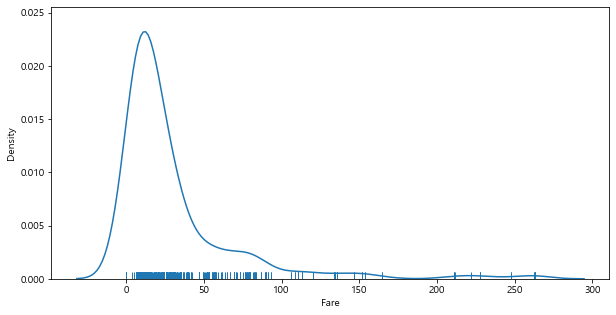

In [49]:
plt.subplots(figsize = (10, 5))
sns.distplot(train.Fare, hist = False, label = '1', kde = True, rug = True)

rug: rugplot. 실수 분포 플롯. 자료의 분포를 묘사.

      데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터의 위치를 보여줌
      
kde: kdeplot. kernel denstiy. 히스토그램보다 부드러운 분포곡선으로 시각화

distplot은 rug와 kde 밀도 시각화가 가능한 옵션을 설정할 수 있어서 matplotlib의 hist보다 많이 사용

In [46]:
(train['Fare']>300).sum()

# 운임 300보다 큰 데이터 3개

3

In [47]:
train = train[train['Fare']<300]
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
...,...,...,...,...,...,...,...,...,...,...,...
767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C
794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S


<AxesSubplot:xlabel='Fare', ylabel='Density'>

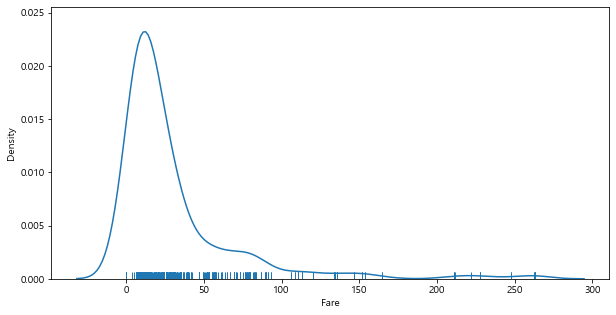

In [50]:
plt.subplots(figsize = (10, 5))
sns.distplot(train.Fare, hist = False, label = '1', kde = True, rug = True)

In [51]:
survived = train[train['Survived'] == 1]
survived

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,NaN,S
661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S
709,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S


In [53]:
dead = train[train['Survived'] == 0]
dead

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q
206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
...,...,...,...,...,...,...,...,...,...,...,...
634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S
767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C


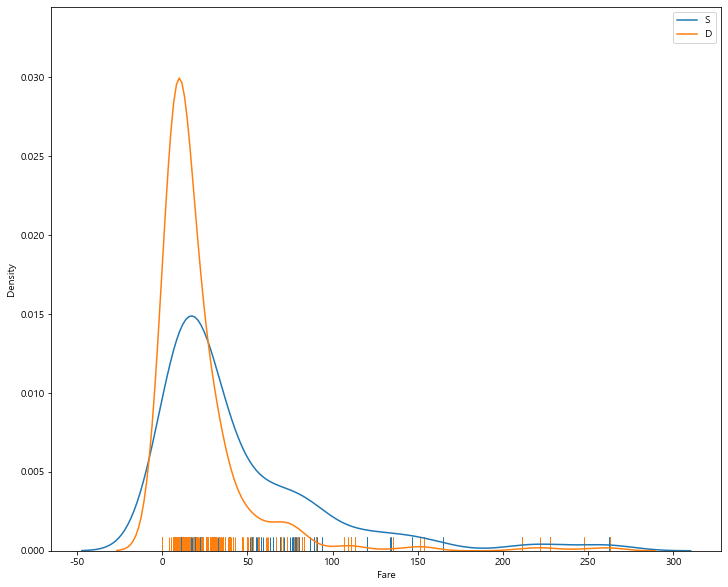

In [79]:
plt.subplots(figsize = (12, 10))
sns.distplot(survived.Fare, hist = False, label = 'S', kde = True, rug = True)
sns.distplot(dead.Fare, hist = False, label = 'D', kde = True, rug = True)
plt.legend()

<AxesSubplot:xlabel='Fare', ylabel='Density'>

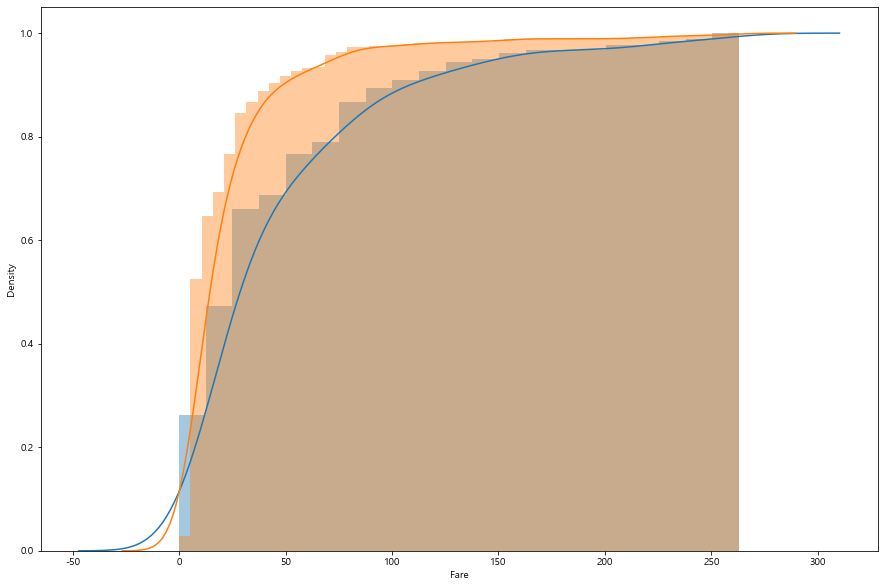

In [60]:
plt.subplots(figsize= (15, 10))
sns.distplot(survived.Fare, hist_kws = dict(cumulative = True),
            kde_kws = dict(cumulative = True))
sns.distplot(dead.Fare, hist_kws = dict(cumulative = True),
            kde_kws = dict(cumulative = True))

In [63]:
train.Fare.describe()

count    888.000000
mean      30.582164
std       41.176366
min        0.000000
25%        7.895800
50%       14.454200
75%       30.771850
max      263.000000
Name: Fare, dtype: float64

In [67]:
train['cheap'] = train['Fare'] < 7.8958
train['proper'] = (train['Fare'] >= 7.8958) & (train['Fare'] < 30.77185)
train['expensive'] = train['Fare'] >= 30.77185

train[['cheap', 'proper', 'expensive']].head()

,cheap,proper,expensive
PassengerId,,,
430,False,True,False
752,False,True,False
824,False,True,False
129,False,True,False
700,True,False,False


In [80]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.741214
male      0.186087
Name: Survived, dtype: float64

In [81]:
train['Male'] = train['Sex'] == 'male'
train['Female'] = train['Sex'] == 'female'

train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cheap,proper,expensive,Male,Female
PassengerId,,,,,,,,,,,,,,,,
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S,False,True,False,True,False
752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S,False,True,False,True,False
824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S,False,True,False,False,True
129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,False,True,False,False,True
700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,False,False,True,True,False
794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C,False,True,False,True,False
823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,True,False,False,True,False


<AxesSubplot:>

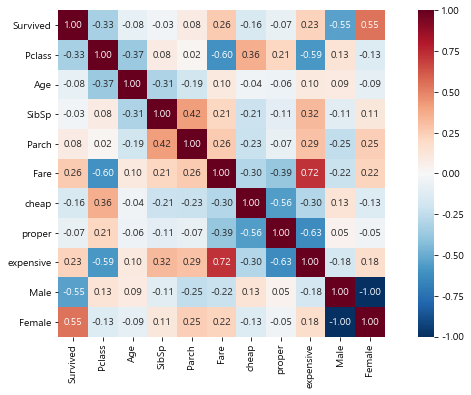

In [84]:
fig = plt.gcf() # get the current figure. If no current figure exists, a new one is created using figure()
fig.set_size_inches(12, 6)
sns.heatmap(train.corr(), cmap = 'RdBu_r', square = True, cbar = True, annot = True, fmt = ".2f")

In [85]:
mean_by_P = train.groupby('Pclass')['Age'].mean()

In [86]:
mean_by_P

Pclass
1    38.280984
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [87]:
train.loc[(train.Age.isnull()) & (train.Pclass == 1), 'Age'] = mean_by_P[1]
train.loc[(train.Age.isnull()) & (train.Pclass == 2), 'Age'] = mean_by_P[2]
train.loc[(train.Age.isnull()) & (train.Pclass == 3), 'Age'] = mean_by_P[3]

In [88]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cheap,proper,expensive,Male,Female
PassengerId,,,,,,,,,,,,,,,,
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.000000,0,0,SOTON/O.Q. 392078,8.0500,E10,S,False,True,False,True,False
752,1,3,"Moor, Master. Meier",male,6.000000,0,1,392096,12.4750,E121,S,False,True,False,True,False
824,1,3,"Moor, Mrs. (Beila)",female,27.000000,0,1,392096,12.4750,E121,S,False,True,False,False,True
129,1,3,"Peter, Miss. Anna",female,25.140620,1,1,2668,22.3583,F E69,C,False,True,False,False,True
700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.000000,0,0,348121,7.6500,F G63,S,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0,1,"Brewe, Dr. Arthur Jackson",male,38.280984,0,0,112379,39.6000,NaN,C,False,False,True,True,False
794,0,1,"Hoyt, Mr. William Fisher",male,38.280984,0,0,PC 17600,30.6958,NaN,C,False,True,False,True,False
823,0,1,"Reuchlin, Jonkheer. John George",male,38.000000,0,0,19972,0.0000,NaN,S,True,False,False,True,False


In [89]:
train.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        686
Embarked       0
cheap          0
proper         0
expensive      0
Male           0
Female         0
dtype: int64

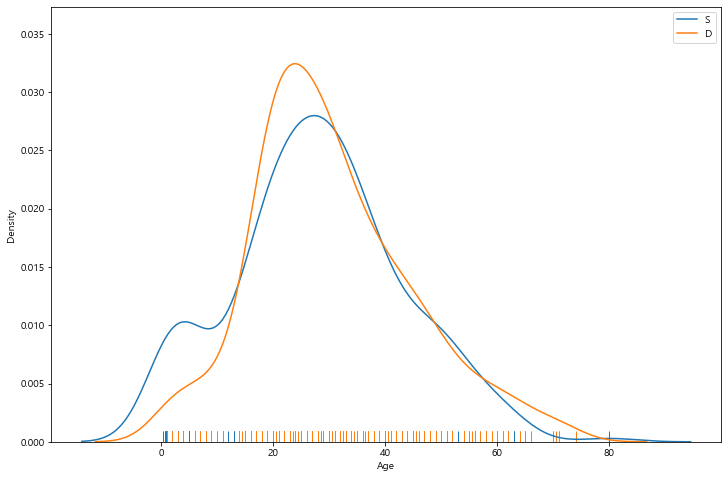

In [90]:
plt.subplots(figsize = (12,8))
sns.distplot(survived.Age, hist = False, label = 'S', kde = True, rug = True)
sns.distplot(dead.Age, hist = False, label = 'D', kde = True, rug = True)
plt.legend()

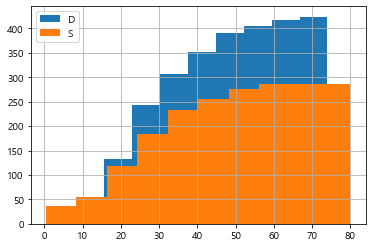

In [95]:
dead.Age.hist(cumulative = 'True', label = 'D')
survived.Age.hist(cumulative = 'True', label = 'S')
plt.legend()

In [96]:
survived.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age          52
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       205
Embarked      0
dtype: int64

In [97]:
dead.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         125
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       481
Embarked      0
dtype: int64

In [98]:
train['young'] = train['Age'] <= 30
train['old'] = train['Age'] > 30
train[['young', 'old']]

,young,old
PassengerId,,
430,False,True
752,True,False
824,True,False
129,True,False
700,False,True
...,...,...
767,False,True
794,False,True
823,False,True


In [99]:
train.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        686
Embarked       0
cheap          0
proper         0
expensive      0
Male           0
Female         0
young          0
old            0
dtype: int64

In [100]:
def get_title(name):
    return name.split(",")[1].split(".")[0].strip()

train['Title'] = train['Name'].apply(get_title)

In [101]:
train['Title']

PassengerId
430          Mr
752      Master
824         Mrs
129        Miss
700          Mr
         ...   
767          Dr
794          Mr
823    Jonkheer
843        Miss
857         Mrs
Name: Title, Length: 888, dtype: object

In [102]:
train.Title.unique()

array(['Mr', 'Master', 'Mrs', 'Miss', 'Rev', 'Dr', 'Ms', 'Lady', 'Sir',
       'Col', 'Capt', 'Mme', 'Mlle', 'Major', 'the Countess', 'Don',
       'Jonkheer'], dtype=object)

In [103]:
train.Title.value_counts()

Mr              515
Miss            181
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Jonkheer          1
Capt              1
Mme               1
the Countess      1
Ms                1
Sir               1
Don               1
Lady              1
Name: Title, dtype: int64

In [104]:
def get_title2(name):
    title = name.split(",")[1].split(".")[0].strip()
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    else:
        return 'other'

In [105]:
train['Title'] = train['Name'].apply(get_title2)

In [106]:
train.Title.unique()

array(['Mr', 'Master', 'Mrs', 'Miss', 'other'], dtype=object)

In [107]:
train.groupby('Title')['Survived'].mean()

Title
Master    0.575000
Miss      0.696133
Mr        0.153398
Mrs       0.792000
other     0.444444
Name: Survived, dtype: float64

In [108]:
train['Title_Mr'] = train['Title'] == 'Mr'
train['Title_Mrs'] = train['Title'] == 'Mrs'
train['Title_Miss'] = train['Title'] == 'Miss'
train['Title_Master'] = train['Title'] == 'Master'
train['Title_other'] = train['Title'] == 'other'

train[['Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Master', 'Title_other']].head()

,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_other
PassengerId,,,,,
430,True,False,False,False,False
752,False,False,False,True,False
824,False,True,False,False,False
129,False,False,True,False,False
700,True,False,False,False,False


In [110]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Male,Female,young,old,Title,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_other
PassengerId,,,,,,,,,,,,,,,,,,,,,
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.000000,0,0,SOTON/O.Q. 392078,8.0500,E10,...,True,False,False,True,Mr,True,False,False,False,False
752,1,3,"Moor, Master. Meier",male,6.000000,0,1,392096,12.4750,E121,...,True,False,True,False,Master,False,False,False,True,False
824,1,3,"Moor, Mrs. (Beila)",female,27.000000,0,1,392096,12.4750,E121,...,False,True,True,False,Mrs,False,True,False,False,False
129,1,3,"Peter, Miss. Anna",female,25.140620,1,1,2668,22.3583,F E69,...,False,True,True,False,Miss,False,False,True,False,False
700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.000000,0,0,348121,7.6500,F G63,...,True,False,False,True,Mr,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0,1,"Brewe, Dr. Arthur Jackson",male,38.280984,0,0,112379,39.6000,NaN,...,True,False,False,True,other,False,False,False,False,True
794,0,1,"Hoyt, Mr. William Fisher",male,38.280984,0,0,PC 17600,30.6958,NaN,...,True,False,False,True,Mr,True,False,False,False,False
823,0,1,"Reuchlin, Jonkheer. John George",male,38.000000,0,0,19972,0.0000,NaN,...,True,False,False,True,other,False,False,False,False,True


In [111]:
train['Embarked']

PassengerId
430    S
752    S
824    S
129    C
700    S
      ..
767    C
794    C
823    S
843    C
857    S
Name: Embarked, Length: 888, dtype: object

In [112]:
train.groupby('Embarked')['Survived'].mean()

Embarked
C    0.545455
Q    0.397436
S    0.337984
Name: Survived, dtype: float64

In [114]:
train['Embarked_C'] = train['Embarked'] == 'C'
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_Q'] = train['Embarked'] == 'Q'

train[['Embarked_C', 'Embarked_S', 'Embarked_Q']].head()

,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,
430,False,True,False
752,False,True,False
824,False,True,False
129,True,False,False
700,False,True,False


In [115]:
train['FamilySize'] = train['SibSp'] + train['Parch']

In [116]:
train.groupby('FamilySize')['Survived'].mean()

FamilySize
0     0.300935
1     0.550000
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [117]:
train.loc[train['FamilySize'] <= 1, 'Family_cl'] = 'Single'
train.loc[(train['FamilySize'] >= 2) & (train['FamilySize'] < 5), 'Family_cl'] = 'Nuclear'
train.loc[train['FamilySize'] >= 5, 'Family_cl'] = 'Big'
train[['FamilySize', 'Family_cl']].head(10)

,FamilySize,Family_cl
PassengerId,,
430,0,Single
752,1,Single
824,1,Single
129,2,Nuclear
700,0,Single
76,0,Single
716,0,Single
777,0,Single
11,2,Nuclear


In [118]:
train['Family_cl_S'] = train['Family_cl'] == 'Single'
train['Family_cl_N'] = train['Family_cl'] == 'Nuclear'
train['Family_cl_B'] = train['Family_cl'] == 'Big'

train[['Family_cl_S', 'Family_cl_N', 'Family_cl_B']].head()

,Family_cl_S,Family_cl_N,Family_cl_B
PassengerId,,,
430,True,False,False
752,True,False,False
824,True,False,False
129,False,True,False
700,True,False,False


In [119]:
train['Cabin'] = train['Cabin'].str[:1]

In [122]:
pd.pivot_table(data = train, index = ['Pclass', 'Cabin'], values = 'Survived')

Survived
Pclass Cabin          
1      A      0.466667
       B      0.733333
       C      0.593220
       D      0.758621
       E      0.720000
       T      0.000000
2      D      0.750000
       E      0.750000
       F      0.875000
3      E      1.000000
       F      0.200000
       G      0.500000

In [127]:
train.loc[(train.Cabin.isnull()) & (train.Pclass == 1), 'Cabin'] = 'D'
train.loc[(train.Cabin.isnull()) & (train.Pclass == 2), 'Cabin'] = 'F'
train.loc[(train.Cabin.isnull()) & (train.Pclass == 3), 'Cabin'] = 'E'

# 강사님꺼랑 다르게 분류함

In [128]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Master,Title_other,Embarked_C,Embarked_S,Embarked_Q,FamilySize,Family_cl,Family_cl_S,Family_cl_N,Family_cl_B
PassengerId,,,,,,,,,,,,,,,,,,,,,
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.00000,0,0,SOTON/O.Q. 392078,8.0500,E,...,False,False,False,True,False,0,Single,True,False,False
752,1,3,"Moor, Master. Meier",male,6.00000,0,1,392096,12.4750,E,...,True,False,False,True,False,1,Single,True,False,False
824,1,3,"Moor, Mrs. (Beila)",female,27.00000,0,1,392096,12.4750,E,...,False,False,False,True,False,1,Single,True,False,False
129,1,3,"Peter, Miss. Anna",female,25.14062,1,1,2668,22.3583,F,...,False,False,True,False,False,2,Nuclear,False,True,False
700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.00000,0,0,348121,7.6500,F,...,False,False,False,True,False,0,Single,True,False,False


In [130]:
train[train.Cabin.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Master,Title_other,Embarked_C,Embarked_S,Embarked_Q,FamilySize,Family_cl,Family_cl_S,Family_cl_N,Family_cl_B
PassengerId,,,,,,,,,,,,,,,,,,,,,


In [131]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [132]:
mean_by_P = train.groupby('Pclass')['Age'].mean()

In [133]:
mean_by_P

Pclass
1    38.280984
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [134]:
test.loc[(test.Age.isnull())&(test.Pclass==1), 'Age'] = mean_by_P[1]
test.loc[(test.Age.isnull())&(test.Pclass==2), 'Age'] = mean_by_P[2]
test.loc[(test.Age.isnull())&(test.Pclass==3), 'Age'] = mean_by_P[3]

In [135]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [136]:
train['Fare'].mean()

30.582164076576575

In [137]:
test[test.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [143]:
test.loc[test.Fare.isnull() == True, 'Fare'] = train['Fare'].mean()

In [144]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [145]:
test.loc[(test.Cabin.isnull()) & (test.Pclass == 1), 'Cabin'] = 'D'
test.loc[(test.Cabin.isnull()) & (test.Pclass == 2), 'Cabin'] = 'F'
test.loc[(test.Cabin.isnull()) & (test.Pclass == 3), 'Cabin'] = 'E'

# 강사님꺼랑 다르게 분류함

In [146]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [147]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,E,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,E,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,F,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,E,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,E,S


In [148]:
test['cheap'] = test['Fare'] < 7.8958
test['proper'] = (test['Fare'] >= 7.8958) & (test['Fare'] < 30.77185)
test['expensive'] = test['Fare'] >= 30.77185

test[['cheap', 'proper', 'expensive']].head()

,cheap,proper,expensive
PassengerId,,,
892,True,False,False
893,True,False,False
894,False,True,False
895,False,True,False
896,False,True,False


In [149]:
test['young'] = test['Age'] <= 30
test['old'] = test['Age'] > 30

test[['young','old']].head()

,young,old
PassengerId,,
892,False,True
893,False,True
894,False,True
895,True,False
896,True,False


In [150]:
test['Title'] = test['Name'].apply(get_title2)

In [151]:
train.groupby('Title')['Survived'].mean()

Title
Master    0.575000
Miss      0.696133
Mr        0.153398
Mrs       0.792000
other     0.444444
Name: Survived, dtype: float64

In [152]:
test['Title_Mr'] = test['Title'] == 'Mr'
test['Title_Mrs'] = test['Title'] == 'Mrs'
test['Title_Miss'] = test['Title'] == 'Miss'
test['Title_Master'] = test['Title'] == 'Master'
test['Title_other'] = test['Title'] == 'other'

test[['Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Master', 'Title_other']].head()

,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_other
PassengerId,,,,,
892,True,False,False,False,False
893,False,True,False,False,False
894,True,False,False,False,False
895,True,False,False,False,False
896,False,True,False,False,False


In [153]:
test['Male'] = test['Sex'] == 'male'
test['Female'] = test['Sex'] == 'female'

test[['Male', 'Female']].head()

,Male,Female
PassengerId,,
892,True,False
893,False,True
894,True,False
895,True,False
896,False,True


In [154]:
test['Embarked_C'] = test['Embarked'] == 'C'
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_Q'] = test['Embarked'] == 'Q'

test[['Embarked_C', 'Embarked_S', 'Embarked_Q']].head()

,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,
892,False,False,True
893,False,True,False
894,False,False,True
895,False,True,False
896,False,True,False


In [155]:
test['FamilySize'] = test['SibSp'] + test['Parch']

In [156]:
test.loc[test['FamilySize']<=1, 'Family_cl'] = 'Single'
test.loc[(test['FamilySize']>=2)&(test['FamilySize']<5), 'Family_cl'] = 'Nuclear'
test.loc[test['FamilySize']>=5, 'Family_cl'] = 'Big'

In [157]:
test['Family_cl_S'] = test['Family_cl'] == 'Single'
test['Family_cl_N'] = test['Family_cl'] == 'Nuclear'
test['Family_cl_B'] = test['Family_cl'] == 'Big'

test[['Family_cl_S', 'Family_cl_N', 'Family_cl_B']].head()

,Family_cl_S,Family_cl_N,Family_cl_B
PassengerId,,,
892,True,False,False
893,True,False,False
894,True,False,False
895,True,False,False
896,False,True,False


In [158]:
test.shape

(418, 31)

In [160]:
train.shape

(888, 32)

In [161]:
train.columns.unique()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'cheap', 'proper', 'expensive', 'Male',
       'Female', 'young', 'old', 'Title', 'Title_Mr', 'Title_Mrs',
       'Title_Miss', 'Title_Master', 'Title_other', 'Embarked_C', 'Embarked_S',
       'Embarked_Q', 'FamilySize', 'Family_cl', 'Family_cl_S', 'Family_cl_N',
       'Family_cl_B'],
      dtype='object')

In [175]:
feature_names = ['cheap', 'proper', 'expensive',
        'Embarked_C', 'Embarked_S', 'Embarked_Q',
        'Family_cl_S', 'Family_cl_N', 'Family_cl_B']

In [176]:
X_train = train[feature_names]

In [177]:
X_test = test[feature_names]

In [178]:
y_train = train['Survived']
y_train.shape

(888,)

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
forest = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 1123)

In [181]:
%time forest = forest.fit(X_train, y_train)

Wall time: 241 ms


In [183]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(forest, X_train, y_train, cv = 10, scoring = 'roc_auc'))

score

Wall time: 5.88 s


0.6991912890041232

In [184]:
y_pred = forest.predict(X_test)

print(y_pred.shape)
y_pred

(418,)


array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [186]:
submit = pd.read_csv("data_titanic/gender_submission.csv", index_col = 'PassengerId')

In [187]:
print(submit.shape)

(418, 1)


In [190]:
submit['Survived'] = forest.predict(X_test)

In [192]:
submit.to_csv('data_titanic/submit_{0:4f}.csv'.format(score))

In [193]:
from lightgbm import LGBMClassifier

In [194]:
lgbm_wrapper = LGBMClassifier(n_estimators = 400)

In [196]:
evals = [(X_test, y_test)]
preds = lgbm_wrapper.predict(X_test)

NameError: name 'y_test' is not defined